# For the final project we're going to work with financial data.  Given most of the websites that supply this information have been deprecated we're going to use the Pandas data reader and iex. 

In [169]:
#get the appropriate libraries and import the data
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#create object variables start and end
start = date.today()-timedelta(720)
end = date.today()


#set up for stock ticker
ticker = 'GOOG'

#get data from iex
data_source = 'iex'


#create data reader object
stock_data = DataReader(ticker,data_source,start,end)



In [170]:
#table of stock data for google
stock_data.head()



,open,high,low,close,volume
date,,,,,
2016-12-05,757.71,763.90,752.900,762.52,1394223
2016-12-06,764.73,768.83,757.340,759.11,1690689
2016-12-07,761.00,771.36,755.800,771.19,1760966
2016-12-08,772.48,778.18,767.230,776.42,1488059
2016-12-09,780.00,789.43,779.021,789.29,1821914


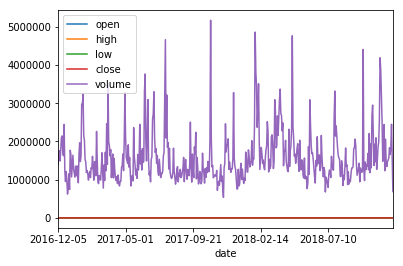

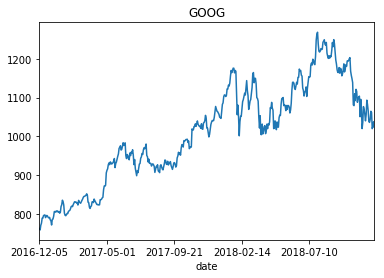

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot all variables
stock_data.plot()
plt.show()

#refining to show google at close over time as volume dominates the first chart
stock_data['close'].plot(title=ticker)

Typically averages are used often to determine a markets major trend, we're going to import the dow jones industrial average and then calculate the average to show how it's changed in the last two years

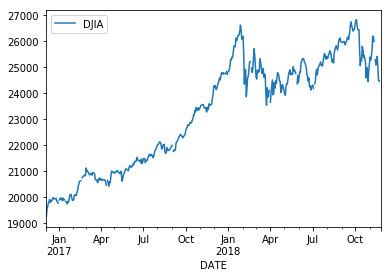

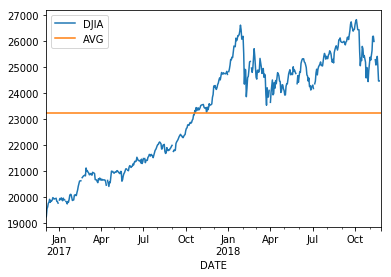

In [172]:
import numpy as np
import pandas as pd

#read in dow jones data from Fred
data = DataReader('DJIA', 'fred', start, end)

#dow jones over time
data.plot()
plt.show()

#adding in an average line
data.insert(1,'AVG',(np.sum(data.DJIA)/data.DJIA.count()))


#dow jones over time
data.plot()
plt.show()


Let's create a function that allows a user to input data and return a plot for a certain stock over a certain time period

Please enter a stock symbol: GOOG
Please enter a start date in YYYY-MM-DD format: 2018-01-01
Please enter an end date in YYYY-MM-DD format: 2018-11-01


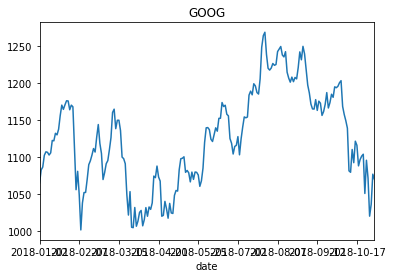

In [173]:
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#User defined function to pull data for a user input stock
while True:
    try:
         ticker = str(input("Please enter a stock symbol: "))
         start = str(input("Please enter a start date in YYYY-MM-DD format: "))
         end = str(input("Please enter an end date in YYYY-MM-DD format: "))
         data_source = 'iex'
         stock_data = DataReader(ticker,data_source,start,end)
         stock_data['close'].plot(title=ticker)
         break  
        
    except ValueError:
         print("Please enter a valid stock symbol and a date in YYYY-MM-DD format, e.g.: 2018-11-23")

